# <center>АНАЛИЗ СПРОСА НА РЕЙСЫ АВИАКОМПАНИИ "F9"</center>

«F9» — российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Необходимо исследовать предпочтения пользователей, покупающих билеты на те или иные направления.
Для этого следует изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. База данных об авиаперевозках содержит информацию об аэропортах, самолетах, билетах, рейсах и фестивалях.

Был написан парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года. 
С помощью SQL-запросов были получены две таблицы с данными:
1. модели самолетов и количество рейсов для каждой модели model в сентябре 2018 года;
2. города и среднее количество рейсов, прибывающих в каждый город за день в августе 2018 года.


Перед нами стоят следующие задачи:
- импортировать файлы и изучить данные в них;
- проверить корректность типов данных;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы.


## ИЗУЧЕНИЕ ДАННЫХ

In [1]:
# Импортируем библиотеки и получим общую информацию

import pandas as pd

flights_amount.info()
flights_amount.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [2]:
# Получаем общую информацию по второй таблице

average_flights.info()
average_flights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


### ВЫВОД

Имеем 2 таблицы с данными: в первой таблице содержится информация о модели самолета и количестве рейсов для каждой из них, вторая таблица содердит список городов и среднее количество рейсов, прибывающих в каждый город. Данные не содержат пропусков. Типы данных корректны.

## ПРЕДОБРАБОТКА ДАННЫХ

На этапе изучения данных отметили, что пропуски в таблицах отсутствуют. Проверим наличие дубликатов в таблицах.

In [3]:
flights_amount.duplicated().sum() # проверяем наличие дубликатов

0

In [4]:
average_flights.duplicated().sum() # проверяем наличие дубликатов

0

Дублирующих строк в таблицах не обнаружено.

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ

### ТОП-10 ГОРОДОВ

Выберем топ-10 городов по количеству прибывающих рейсов.

In [5]:
# Выведем первые топ-10 городов по количеству прибывающих рейсов
af_top = average_flights.nlargest(10, 'average_flights', keep='first')
af_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### ПОСТРОЕНИЕ ГРАФИКОВ

Построим график зависимости количества рейсов от модели самолета

In [6]:
fa = flights_amount.pivot_table(index = 'model', values = 'flights_amount').reset_index()
fa

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


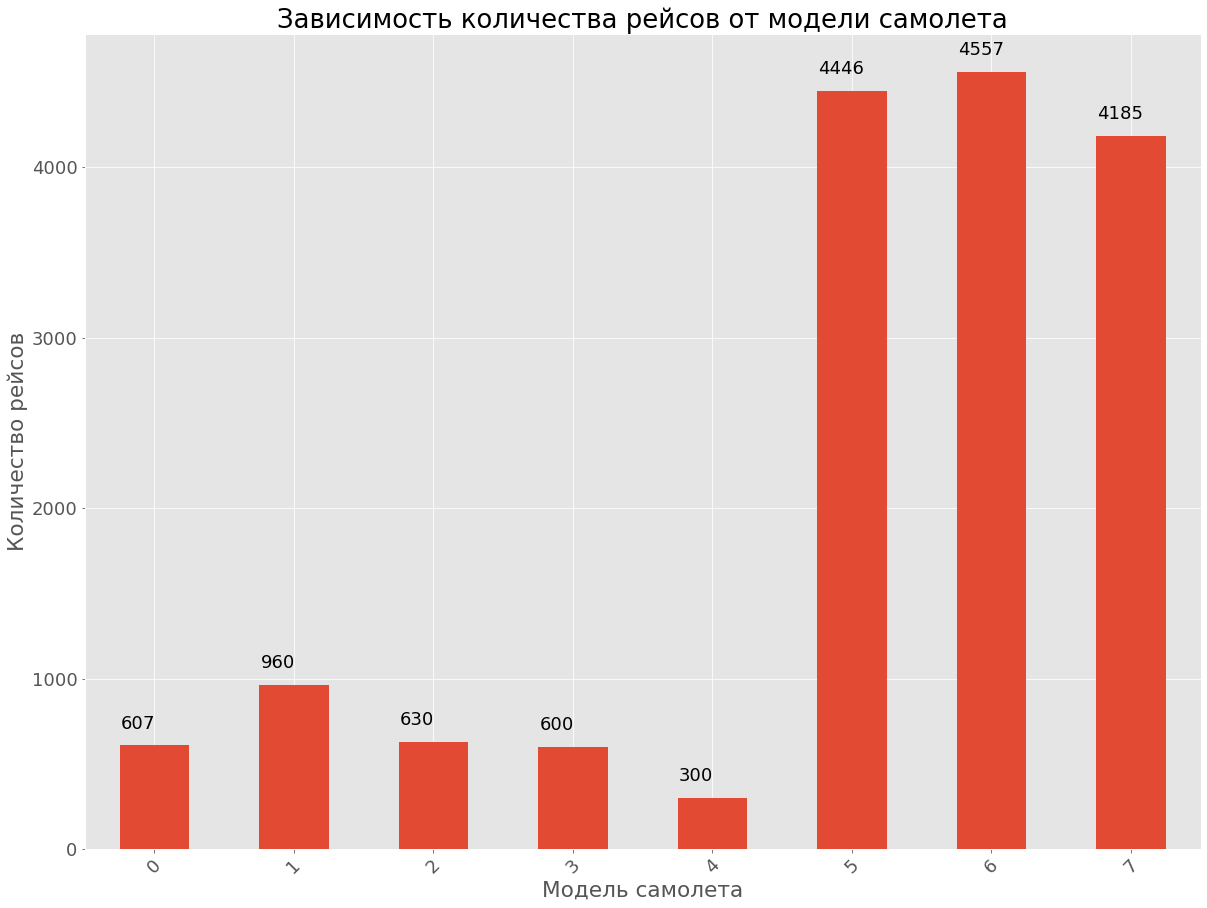

In [7]:
#Импортируем библиотеку MatPlot для построения графиков
import matplotlib.pyplot as plt

plt.style.use('ggplot') # выбираем оформление в стиле ggplot
plt.rcParams.update({'font.size': 18}) # размер шрифта на графике
plt.rcParams["figure.figsize"] = (20,15) # размеры графика

ax = fa.plot.bar() # строим график в виде столбчатой диаграммы

plt.ylabel('Количество рейсов') # название оси ординат
plt.xlabel('Модель самолета') # название оси абцисс
plt.title('Зависимость количества рейсов от модели самолета') # заголовок графика
plt.xticks(rotation=45) # поворачиваем текст по оси абцисс

# Добавим значение над каждым столбцом графика
for i in ax.patches:
    ax.text(
        i.get_x()+0.01, i.get_height()+100, str((i.get_height())), fontsize=18, color='black')
ax.get_legend().remove() # убираем легенду

plt.show()

В топе находятся 3 модели самолетов: *Cessna 208 Caravan*, *Bombardier CRJ-200*, *Sukhoi SuperJet-100*, это небольшие самолеты для региональных перевозок, рассчитанные на 14, 50 и 100 пассажиров соответственно. Обычно это чартерные рейсы, билеты на них стоят дешевле, летают они чаще, соответственно и спрос больше.

Построим график зависимости количества рейсов от города прибытия.

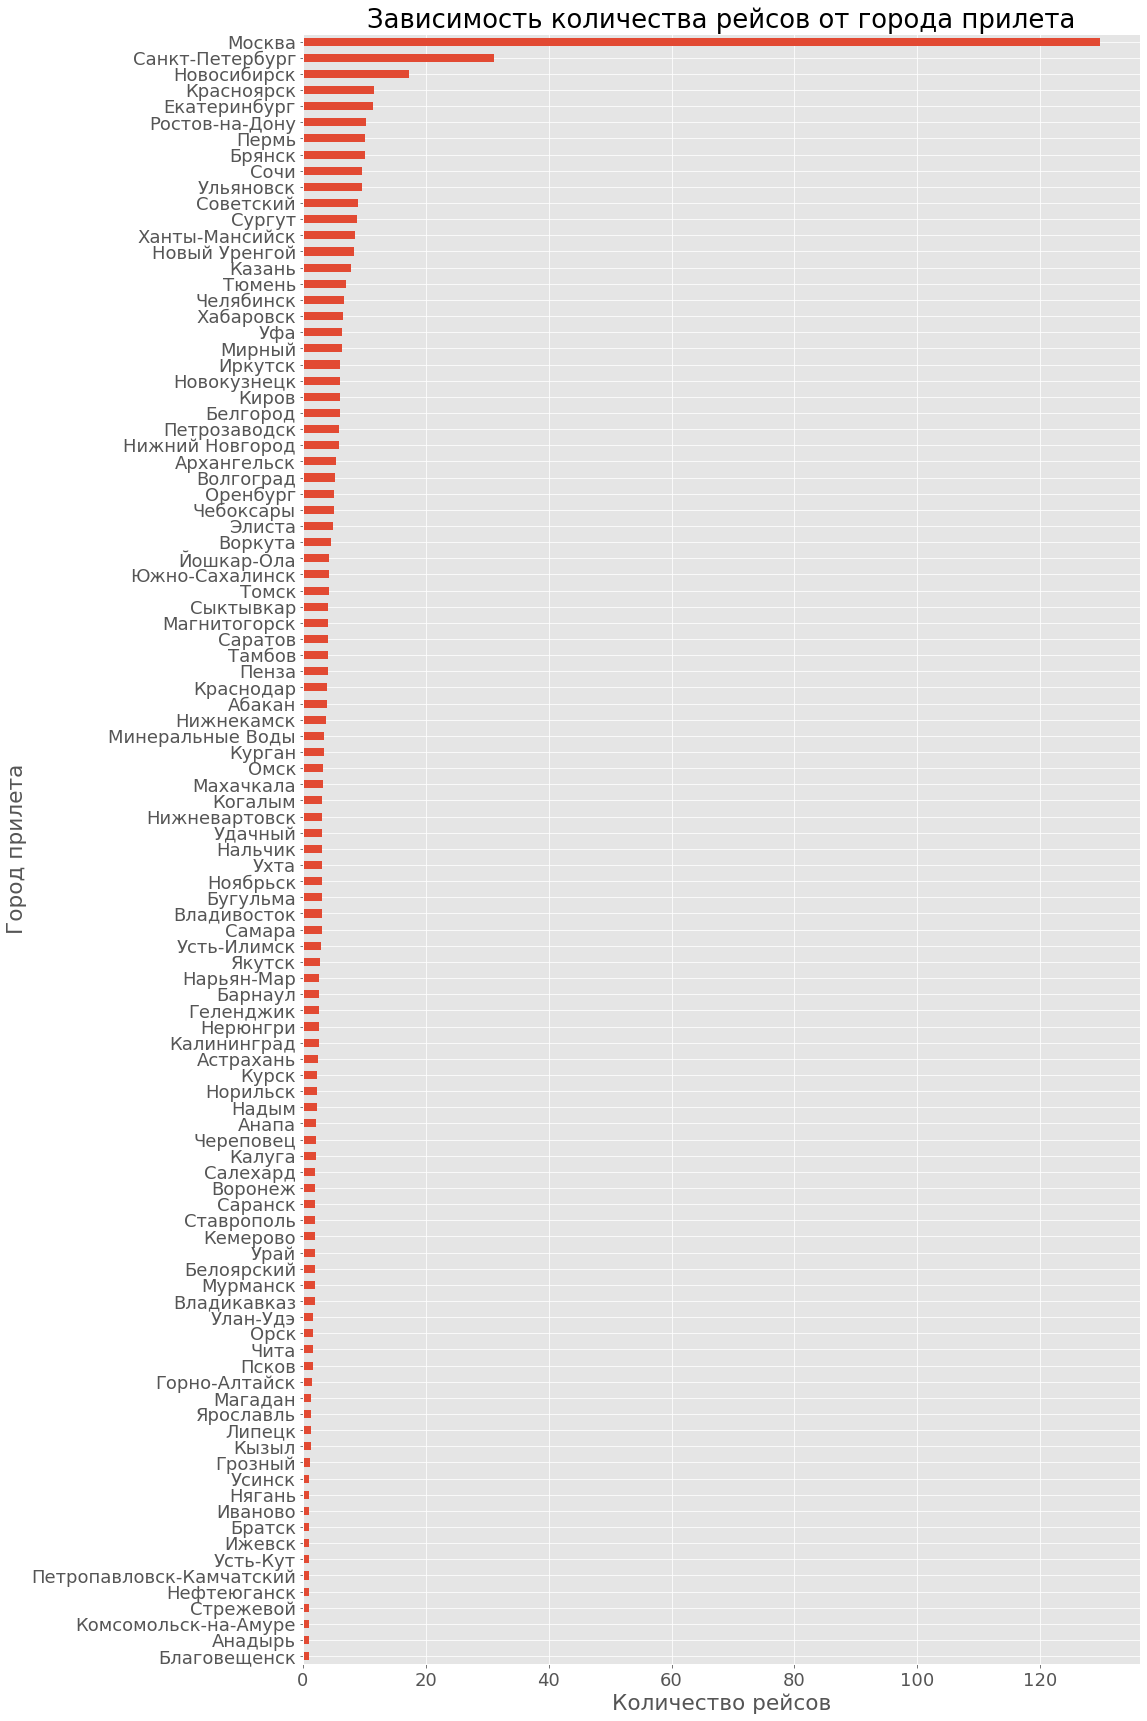

In [8]:
# сортируем данные по убыванию количества рейсов и строим график

average_flights.sort_values(by='average_flights', ascending=True).plot(
    kind='barh',
    x='city',
    y='average_flights', 
    grid=True,
    figsize=(15,30))

plt.title('Зависимость количества рейсов от города прилета')
plt.ylabel('Город прилета')
plt.xlabel('Количество рейсов')
plt.legend().remove()
plt.show()

Среди всех городов резко выделяется Москва, это не вызывает никаких подозрений, тк большинтсов фестивалей проводится именно в Москве, следом идут так же крупные города - Санкт-Петербург, Новосибирск, Красноярск, Екатеренбург и Ростов-на-Дону.

Построим график зависимости количества рейсов от топ-10 городов.

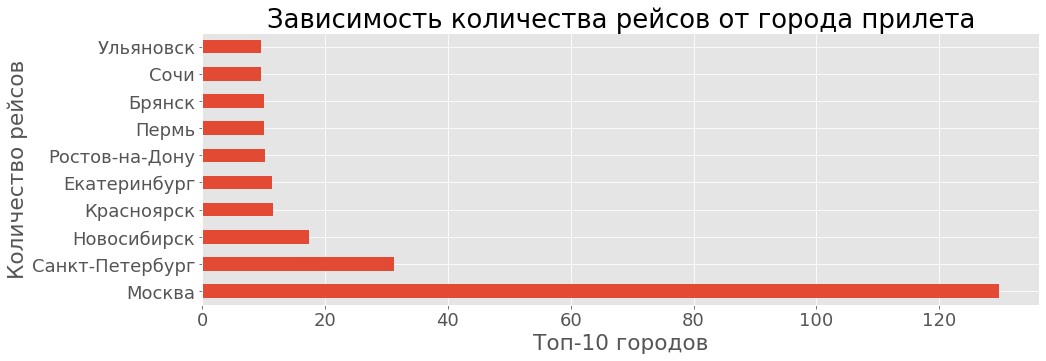

In [9]:
# строим график для топ-10 городов

af_top.plot(
    kind='barh',
    x='city',
    y='average_flights', 
    grid=True,
    figsize=(15,5)
)

plt.title('Зависимость количества рейсов от города прилета')
plt.ylabel('Количество рейсов')
plt.xlabel('Топ-10 городов')
plt.legend().remove()
plt.show()

В топ-10 городов мы отбросили огромный "хвост", где количество рейсов меньше 10. Тренд остался тем же.

## ОБЩИЙ ВЫВОД

   
   В ходе работы были изучены данные, проверена их корректность.
Был выделен топ-10 городов по количеству прибывающих в них рейсов: Москва, Санкт-Петеребург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск. Москва лидирует с большим отрывом - более сотни рейсов в день, в столице в принципе проводится больше фестивалей, но так же это крупный транспортный узел, в котором может осуществляться пересадка(самые популярные аэропорты - Домодедово и Шереметьево).

   Так же было отмечено, что небольшие самолеты для региональных перевозок совершают намного больше рейсов (более 4000 за месяц) - *Cessna 208 Caravan*, *Bombardier CRJ-200*, *Sukhoi SuperJet-100* в отличие от самолетов с пассажировместимостью более 100 человек(*Airbus* и *Boeing*). Это так же может быть связано с наличием пересадок и тем, что для маленьких самолетов по техническим характеристикам открыто больше магистральных маршрутов и меньше требований к техническому обслуживанию, что упрощает их эксплуатацию и позволяет внести больше рейсов в расписание.